# Weather Twitter Bot

## Imports

In [1]:
# changes
from datetime import datetime

import numpy as np
from numpy import mean, std
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm

## Importing data

In [2]:
df = pd.read_csv('weather data.txt',sep = '         ',names=['month','day','year','temp'],engine='python')
df

,month,day,year,temp
0,1,1,1995,71.8
1,1,2,1995,72.0
2,1,3,1995,70.3
3,1,4,1995,69.7
4,1,5,1995,71.3
...,...,...,...,...
9261,5,9,2020,87.3
9262,5,10,2020,87.7
9263,5,11,2020,88.1
9264,5,12,2020,87.3


## Converting columns to an 'datetime' object

In [3]:
df[['day','month','year']] = df[['day','month','year']].astype(int)

In [4]:
df['date'] = df.apply(func=lambda x : str(int(x['day'])).zfill(2)+'/'+str(int(x['month'])).zfill(2)+'/'+str(int(x['year'])),axis=1)
df['date'] = df['date'].apply(func=lambda x : datetime.strptime(x,'%d/%m/%Y'))

In [5]:
df.head()

,month,day,year,temp,date
0,1,1,1995,71.8,1995-01-01
1,1,2,1995,72.0,1995-01-02
2,1,3,1995,70.3,1995-01-03
3,1,4,1995,69.7,1995-01-04
4,1,5,1995,71.3,1995-01-05


In [45]:
data = df[['date','temp']].copy()
data

,date,temp
0,1995-01-01,71.8
1,1995-01-02,72.0
2,1995-01-03,70.3
3,1995-01-04,69.7
4,1995-01-05,71.3
...,...,...
9261,2020-05-09,87.3
9262,2020-05-10,87.7
9263,2020-05-11,88.1
9264,2020-05-12,87.3


## Analyzing Outliers

In [46]:
mean(data['temp']),std(data['temp'])

(81.53172890135981, 10.989219801013546)

 within one standard deviation of the mean will cover 68% of the data.

1 Standard Deviation from the Mean: 68%

2 Standard Deviations from the Mean: 95%

3 Standard Deviations from the Mean: 99.7%

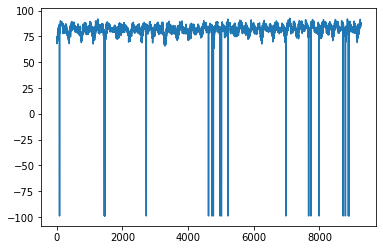

In [39]:
plt.plot(data['temp'])

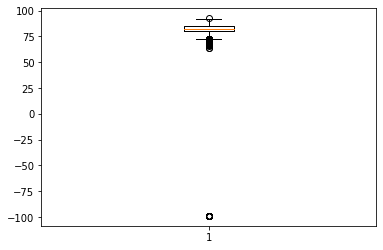

In [40]:
plt.boxplot(data['temp']);

## Outlier removal type 1

In [82]:
data = df[['date','temp']].copy()
for ind,x in tqdm(data.iterrows()):
    if x['temp'] <60 or x['temp'] >100:
        # data.iloc[ind]['temp'] = mean(data.iloc[ind-2:ind+2]['temp'].mean())
        data.at[ind,'temp'] = mean(data.iloc[ind-20:ind+20]['temp'].mean())
data['temp'].mean(),data['temp'].std()

9266it [00:00, 12038.20it/s]


(82.08925640275615, 3.9101674466518124)

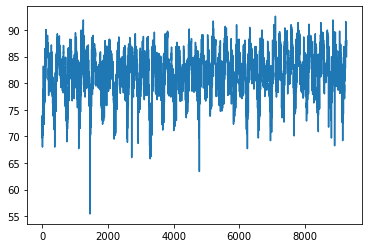

In [83]:
plt.plot(data['temp'])

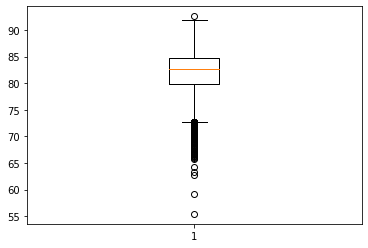

In [84]:
plt.boxplot(data['temp']);

In [85]:
data[(data['temp']<60) | (data['temp']>100)]

,date,temp
1453,1998-12-24,55.422500
1454,1998-12-25,59.135563


## Outlier removal type 2

In [91]:
data = df[['date','temp']].copy()
temp_mean =  data[(data['temp'] > 60) & (data['temp']<100)]['temp'].mean()
data.temp = data.temp.apply(lambda x : temp_mean if x < 60 else x)
data.iloc[80:90]

,date,temp
80,1995-03-22,85.300000
81,1995-03-23,83.700000
82,1995-03-24,82.100000
83,1995-03-25,80.800000
84,1995-03-26,78.800000
85,1995-03-27,78.400000
86,1995-03-28,78.000000
87,1995-03-29,82.118125
88,1995-03-30,80.600000
89,1995-03-31,79.200000


At loc 87 we had an outlier of -99 which has now been replaced with the meand of the rest dataframe i.e. 82.118..

In [92]:
data['temp'].mean(),data['temp'].std()

(82.11812472932004, 3.8602470626651724)

Here we are expecting the exact mean of 82.11812472932004 without outliers as we have replaced the outliers with the same mean value, hence after modifying of outliers the mean remains constant.

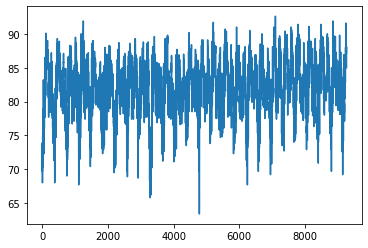

In [88]:
plt.plot(data['temp'])

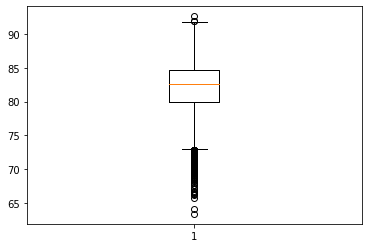

In [89]:
plt.boxplot(data['temp']);

In [90]:
data[(data['temp']<60) | (data['temp']>100)]

,date,temp


In [96]:
data['temp'].std(),data['temp'].mean()

(3.8602470626651724, 82.11812472932004)